In [13]:
import py_wake

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from py_wake.wind_turbines import WindTurbine, WindTurbines
from py_wake.examples.data.hornsrev1 import V80
from py_wake.examples.data.iea37 import IEA37_WindTurbines, IEA37Site
from py_wake.examples.data.dtu10mw import DTU10MW

In [3]:
v80 = V80()
iea37 = IEA37_WindTurbines()
dtu10mw = DTU10MW()

In [4]:
from py_wake.examples.data import wtg_path

wtg_file = os.path.join(wtg_path, 'NEG-Micon-2750.wtg')
neg2750 = WindTurbine.from_WAsP_wtg(wtg_file=wtg_file)

In [5]:
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular

u = [0, 3, 12, 25, 30]
ct = [0, 8/9, 8/9, 0.3, 0]
power = [0, 0, 2000, 2000, 0]

my_wt = WindTurbine(
    name='MyWT',
    diameter=123,
    hub_height=321,
    powerCtFunction=PowerCtTabular(u,power,'kW',ct)
)

In [6]:
from py_wake.wind_turbines.generic_wind_turbines import GenericWindTurbine

gen_wt = GenericWindTurbine('G10MW', 178.3, 119, power_norm=10000, turbulence_intensity=0.1)

In [7]:
wts = WindTurbines.from_WindTurbine_lst([v80, iea37, dtu10mw, my_wt, gen_wt, neg2750])

In [8]:
types = wts.types()
print("Name:\t\t%s" % "\t".join(wts.name(types)))
print('Diameter[m]\t%s' % "\t".join(map(str,wts.diameter(type=types))))
print('Hubheigt[m]\t%s' % "\t".join(map(str,wts.hub_height(type=types))))

Name:		V80	3.35MW	DTU10MW	MyWT	G10MW	NEG-Micon 2750/92 (2750 kW)
Diameter[m]	80.0	130.0	178.3	123.0	178.3	92.0
Hubheigt[m]	70.0	110.0	119.0	321.0	119.0	70.0


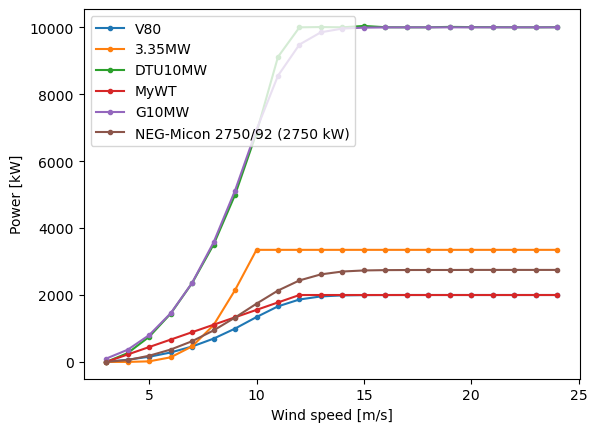

In [9]:
ws = np.arange(3,25)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')

for t in types:
    plt.plot(ws, wts.power(ws, type=t)*1e-3, '.-', label=wts.name(t))
plt.legend()

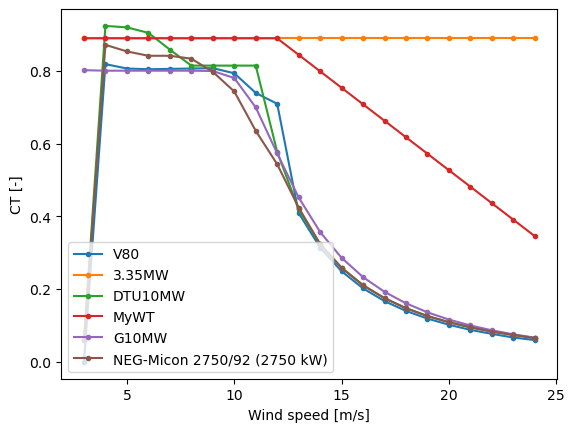

In [10]:
plt.xlabel('Wind speed [m/s]')
plt.ylabel('CT [-]')

for t in types:
    plt.plot(ws, wts.ct(ws, type=t), '.-', label=wts.name(t))
plt.legend()

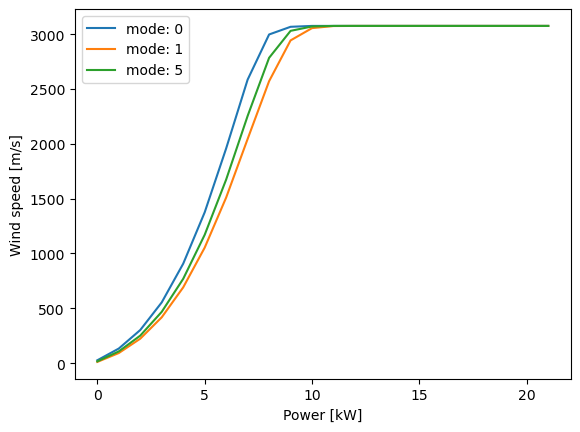

In [11]:
wtg_file = os.path.join(wtg_path, 'Vestas V112-3.0 MW.wtg')
v112 = WindTurbine.from_WAsP_wtg(wtg_file=wtg_file)
required_inputs, optional_inputs = v112.function_inputs
upct = {}

for m in [0,1,5]:
    plt.plot(v112.power(ws, mode=m)/1000, label=f'mode: {m}')

p0, ct0 = v112.power_ct(ws, mode=0)
p1, ct1 = v112.power_ct(ws, mode=1)

plt.xlabel('Power [kW]')
plt.ylabel('Wind speed [m/s]')
plt.legend()

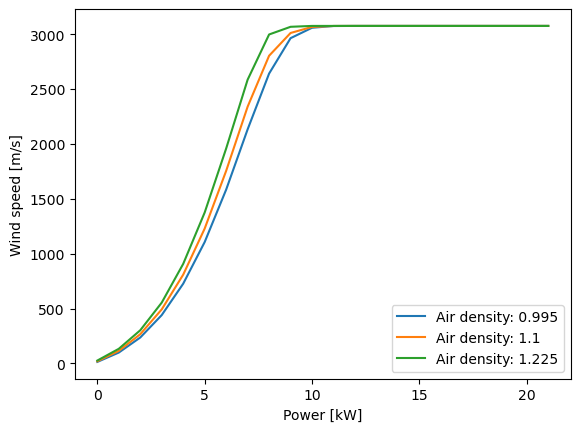

In [12]:
from py_wake.wind_turbines.power_ct_functions import PowerCtNDTabular

power_array = np.array([p1, p0]).T
ct_array = np.array([ct1, ct0]).T
density = [0.95, 1.225]

powerCtFunction = PowerCtNDTabular(
    input_keys=['ws', 'rho'],
    value_lst=[ws, density],
    power_arr=power_array,
    power_unit='w',
    ct_arr=ct_array
)

wt = WindTurbine('AirDensityDependentWT', 112, 84, powerCtFunction=powerCtFunction)

for r in [0.995, 1.1, 1.225]:
    plt.plot(wt.power(ws, rho=r)/1000, label=f'Air density: {r}')
plt.xlabel('Power [kW]')
plt.ylabel('Wind speed [m/s]')
plt.legend()